# Analysis of Fumagalli et al. (2020)

## Documentation

The __[API - Documentation](https://manuelbieri.ch/Fumagalli_2020)__ of the package provides the following information:
- Installation instructions
- Explanations about the models
- Available methods and their usage for every model

The paper, which constitutes the foundation of this program, can be found __[here](https://autopapers.ssrn.com/sol3/papers.cfm?abstract_id=3674889)__. On __[GitHub](https://github.com/manuelbieri/Fumagalli_2020)__ you can find the source code for this project.

### Class hierarchy

__![UML](https://raw.githubusercontent.com/manuelbieri/Fumagalli_2020/master/assets/visual/class_diagram.svg)__

In [13]:
# setup environment

# increase quality of plots
import matplotlib.pyplot as plt

%matplotlib ipympl
plt.rcParams["figure.dpi"] = 300
%config InlineBackend.figure_format ='svg'

# install and import models
# %pip install Fumagalli_Motta_Tarantino_2020
# %pip uninstall Fumagalli_Motta_Tarantino_2020

# import utilities for plots
from Fumagalli_Motta_Tarantino_2020.Notebooks.NotebookUtilities import *
import Fumagalli_Motta_Tarantino_2020 as FMT20


FMT20.IVisualize.fontsize = "medium"

<div style="text-align: justify">
In this section, the paper of Fumagalli et al. (2020)[1] is analyzed from the perspective of killer acquisitions. The next section provides a brief look at the fundamentals such as the parameters and thresholds and later the different models are discussed in detail.[2]
</div>
<br>
<div style="text-align: justify">
But first let us have a look at the game in the model. There are three players: the competition authority or antitrust authority, which enforces the set merger policy, the current monopolist, called the incumbent and the start-up, which owns an innovative prototype, that can grow into a substitute for the current product of the incumbent. But the start-up does not own enough assets for the development of the prototype, therefore it must obtain additional assets from the capital markets or sell out to the incumbent. The incumbent in turn can decide to make bids for the start-up before (early bid) or after the product development (late bid) but depending on the merger policy takeovers can be rejected by the competition authority. If the incumbent acquires the start-up before the development stage, it can decide whether to develop or shelve the product, the latter results in a killer acquisition. Meanwhile, a late takeover only occurs if the product is already developed, which implies that the incumbent cannot shelve the innovation anymore.\newline
</div>
<br>
<div style="text-align: justify">
As the takeover must be approved beforehand, the competition authority compares the counterfactuals with or without the acquisition and if the potential harm done to total welfare with the acquisition is lower than the threshold set with the current merger policy, the takeover is approved. This approach is a “balance of harm” test as suggested by Furman et al. (2019), where the competition authority weights the potential harm with respect to the probabilities of the outcomes. Additionally, depending on the merger policy, it is possible, that the competition authority prohibits every late takeover independent of the harm to total welfare.
</div>
<br>
<div style="text-align: justify">
[1] Note, that this section analyzes the version of the paper published in 2020 and not the revised version published in 2022. Unless noted otherwise, the content of this section is based on Fumagalli et al. (2020).
<br>
[2] The discussed models form a selection of all available models in the package, have a look at the provided notebooks (e.g., Analysis.ipynb or Interactive.ipynb) to go through other models and parameter configurations as well.
<br><br>
Warning: Sometimes the tables are not rendered correctly in the jupyter notebook. As a workaround use PyCharm, which will display the tables correctly.
</div>

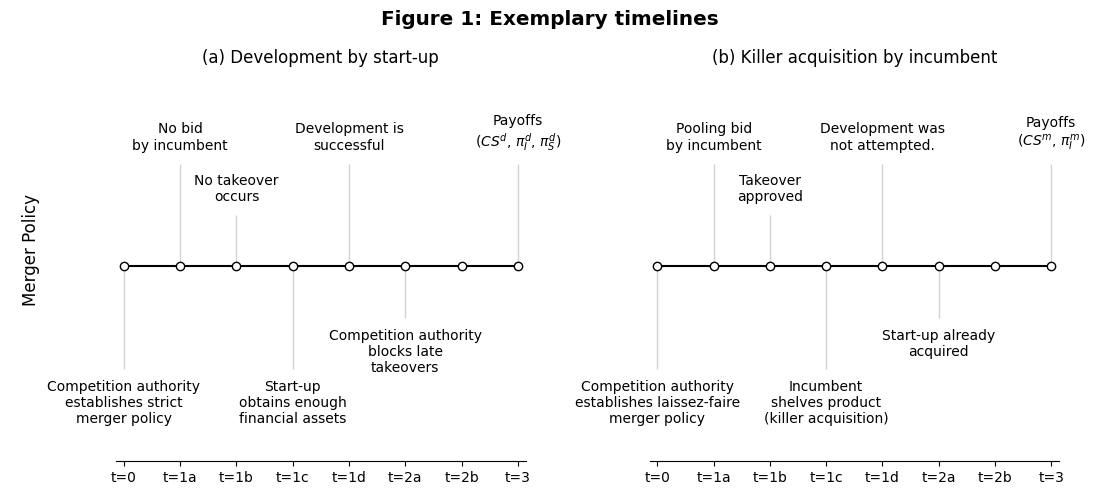

In [25]:
configure_two_axes(
    main="Figure 1: Exemplary timelines",
    sub1="(a) Development by start-up",
    sub2="(b) Killer acquisition by incumbent",
    c1=10,
    c2=10,
    v1=FMT20.Timeline,
    v2=FMT20.Timeline,
    sub_x_label="",
    policy2=FMT20.MergerPolicies.Laissez_faire,
);


<div style="text-align: justify">
As seen in figure 1a and figure 1b, the incumbent can bid for the start-up at two points in time, the available bidding types for the incumbent are refraining from a bid at all or make a separating or pooling bid. A separating bid describes a low offer for the start-up, which is only accepted by the start-up, if it is credit constrained, meaning it would not get enough financial assets on the capital markets to develop its innovation. The other possibility is a pooling bid, where the incumbent offers a takeover price high enough, that the start-up always accepts the offer. Thus, the competition authority can use thresholds based on the transaction value, since a high takeover price may indicate the price to forgo competition. The incumbent compares its options based on the weighted payoffs and decides on a bidding type afterwards. Particularly, the incumbent compares the outcome with a pooling or a separating bid to the outcome without a bid as well as the profits of both bidding types against each other and chooses the option with the highest payoff.<br>
</div>
<br>
<div style="text-align: justify">
At the end of the game the payoffs are realized, which are dependent on the market situation. The following situations are possible: (1) a duopoly, (2) a monopoly with the innovation, and (3) a monopoly without the innovation. The first outcome describes the situation without any takeover and a successful development of the product by the start-up. The second outcome addresses the situation, where the incumbent owns the product at the end of the game, the innovation was either developed by the incumbent itself after an early takeover or developed by the start-up, which was acquired afterwards through a late takeover. The last situation occurs, if the product development was either shelved by the owner or not successful.   The next section focuses on the fundamentals of the models, which guarantee a game as described above.
</div>

## Fundamentals

<br>
<div style="text-align: justify">
The following tables include the necessary information to solve the game. The used parameters and their meanings are listed in table 1. For the further model review, it is important to note, that the development of the product is expected to be profitable for the incumbent, if $p (\pi^M_I-\pi^m_I)\ge K $ is satisfied. This term means, that the incumbent expects to cover at least the development costs with the anticipated profit from the innovation. In this case the incumbent is willing to attempt the development.
</div>

*Table 1: Model Parameters*

| Parameter | Meaning                                                                                                |
| :-------: | :----------------------------------------------------------------------------------------------------- |
| $A$       | Assets of the startup at $t=0$.                                                                        |
| $B$       | Private benefit of the entrepreneur in case of failure.                                                |
| $CS^d$    | Consumer surplus for the case that the innovation is introduced into the market by the start-up.       |
| $CS^M$    | Consumer surplus for the case that the innovation is introduced by the incumbent into the market.      |
| $CS^m$    | Consumer surplus for the case that the innovation is not introduced into the market.                   |
| $\bar{H}$ | Amount of harm to total welfare tolerated by the competition authority (depends on the merger policy). |
| $K$       | Fixed costs for the development.                                                                       |
| $p$       | Probability of success in case of development effort, otherwise the projects fails for sure.           |
| $\pi^d_I$ | Profit of the incumbent in the case of a duopoly.                                                      |
| $\pi^d_S$ | Profit of the start-up in the case of a duopoly.                                                       |
| $\pi^M_I$ | Profit of the monopolistic incumbent with the innovation.                                              |
| $\pi^m_I$ | Profit of the monopolistic incumbent without the innovation.                                           |

<br>
<div style="text-align: justify">
Though, the most influential parameter of the model is the merger policy established by the competition authority. The available merger policies are explained in table 2.
</div>

*Table 2: Merger Policies*

| Policy | Purpose                                                                                                                          |
|:-------|:---------------------------------------------------------------------------------------------------------------------------------|
| $S$    | Strict policy, the competition authority only allows earlytakeovers, which do not harm total welfare ($\bar{H} < H^0$).          |
| $I^P$  | Intermediate policy, which is more lenient with early takeovers, but prohibits every late takeover ($ \bar{H} < H^1$).           |
| $I^A$  | Intermediate policy, which is stricter with early takeovers than laissez-faire, but allows all late takeovers ($\bar{H} < H^2$). |
| $L$    | Laissez-faire policy, the competition authority allows every takeover at any given point in time.                                |

<br>
<div style="text-align: justify">
The difference between a strict policy and its corresponding intermediate policy is, that under the intermediate policy every early takeover is approved, independent of its harm to total welfare. On the contrary the intermediate policy corresponding to the laissez-faire strategy tolerates less harm to total welfare. It specifically avoids takeovers after an early pooling bid with the expectation of a killer acquisition. Additionally, depending on the above-mentioned merger policies, different thresholds for the assets of the start-up apply, which define whether the start-up would obtain enough financial assets on competitive capital markets. The threshold with late takeovers ($\bar{A}^T$) is lower than the threshold without late takeovers ($\bar{A}$) because the prospect of a late takeover generates an option for investors to cash out their investment and therefore, they are more willing to fund the start-up (table 3).
</div>

*Table 3: Thresholds for the Assets of the Start-up*

| Threshold for the Assets   | Meaning                                           |
|:--------------------------:|:-------------------------------------------------- |
| $\bar{A} = B -(p_S^d-K)$   | Used threshold, if late takeovers are prohibited. |
| $\bar{A}^T = B -(p_I^M-K)$ | Used threshold, if late takeovers are allowed.    |

<br>
<div style="text-align: justify">
The exact amount of assets is known to the start-up and additionally, to the investors in the capital markets, since they can examine the accounts, financial and banking records as well as the debt repayment history. The incumbent as well as the competition authority do not know the exact amount of assets the start-up holds, they use thresholds (tables 3 and 4) and presume the distribution of the assets in order to evaluate their options despite the uncertainty. In the model it is assumed, that the assets are distributed on a continuous distribution function between zero and the development costs, since the start-up cannot cover the investment costs on its own.
</div>

*Table 4: Thresholds for the Distribution of the Start-up's Assets*

| Threshold for the Distribution | Meaning |
|:-------------------------------|:--------|
| $\Gamma(\cdot)=\frac{p(W^d-W^M)}{p(W^d-W^m)-K}$                         | Under a strict policy the competition authority approves a takeover through a pooling bid, if the incumbent is expected to invest and $F(\bar{A}) \ge \Gamma(\cdot)$.                                                                                              |
| $\Phi(\cdot)=\frac{p(\pi^M_I-\pi^d_I-\pi^d_S)}{p(\pi^M_I-\pi^d_I)-K}$   | If (1) late takeovers are prohibited, (2) the incumbent is expected to invest and (3) $F(\bar{A}) < \Phi(\cdot)$, a pooling bid is expected to be more profitable than a separating bid, because the probability, that the start-up is constrained, is low enough. |
| $\Phi'(\cdot)=\frac{p(\pi^m_I-\pi^d_I-\pi^d_S)+K}{p(\pi^m_I+\pi^d_I)}$  | If (1) late takeovers are prohibited,  (2) the incumbent is expected to shelve and (3) $F(\bar{A}) < \Phi'(\cdot)$, a pooling bid is expected to be more profitable than no bid, because the probability, that the start-up is constrained, is low enough.         |
| $\Phi^T(\cdot)=\frac{p(\pi^m_I-\pi^M_I)+K}{p(\pi^m_I+\pi^d_S-\pi^M_I)}$ | If (1) late takeovers are allowed, (2) the incumbent is expected to shelve and (3) $F(\bar{A}^T) < \Phi^T(\cdot)$, a pooling bid is expected to be more profitable than no bid, because the probability, that the start-up is constrained, is low enough.          |

<br>
<div style="text-align: justify">
In general, $F(\bar{A}) $ denotes the probability, that the start-up is credit constrained and therefore not able to get the necessary assets for the development on the capital markets. Whenever the start-up is constrained, the incumbent does not want to make a high takeover offer in form of a pooling bid. The incumbent expects a pooling bid to be profitable if $F(\bar{A}) $ is low enough, meaning the probability, that the start-up is able to invest is high enough. The same argument applies for $F(\bar{A}^T) $ if late takeovers are allowed, but the prospect of the late takeover relaxes the financial constraints for the start-up (therefore $F(\bar{A}^T) < F(\bar{A}) $). Furthermore, to guarantee a valid conclusion from the model, some assumptions must be met by the parameters listed in table 5.
</div>

*Table 5: Model Assumptions*

|     | Assumption in the basic Model (noted if modified)          | Implication                                                                                                                                                                                                                                         |
|:---:|:------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| A1  | $\pi^M_I > \pi^d_I + \pi^d_S$ | Otherwise, a takeover never occurs.     |
| A2  | $\pi^d_S > \pi^M_I + \pi^m_I$ | Corresponds to Arrow’s replacement effect, the incumbent has less incentive to innovate. |
| A3  | $p\pi^d_S > K$                | The development is efficient for the start-up |
| A4  | $p(W^M - W^m) > K$            | The innovation is beneficial for the society |
| A5  | $B-(p_S^d-K) > 0 > B-K$       | If the start-up does not exert effort, the project has a negative value. Thus, without effort of the start-up no financial contract could be signed. Even though the project has a positive value, the start-up may be financially constrained. |

<br>
<div style="text-align: justify">
Some of the following models, modify the assumptions made in this section. Whenever this is the case, it is noted in the respective model description. Before the subsequent sections address the specific models and their analysis, the terminology for the abbreviations in the figures is illustrated in table 6.
</div>

*Table 6: Symbol Legend for the Figures*

| Legend Symbol     | Meaning                                                                                           |
|:-----------------:|:--------------------------------------------------------------------------------------------------|
| $N$               | No bid by the incumbent                                                                           |
| $P$               | Pooling bid by the incumbent                                                                      |
| $S$               | Separating bid by the incumbent                                                                   |
| $P/S(\checkmark)$ | Takeover offer is accepted by the start-up                                                        |
| $P/S(\times)$     | Takeover offer is not accepted by the start-up                                                    |
| $\emptyset$       | Development of the product was not attempted                                                      |
| $\checkmark$      | Development of the product is successfully completed                                              |
| $\times$          | Development of the product was attempted but not completed                                        |


## Optimal Merger Policy
<br>
<div style="text-align: justify">
This model implements the criteria given in the previous section. Figure 2 shows the payoffs realized for different market situations, which provide the base to solve the game (maximum values are in darker color).
</div>
<br>

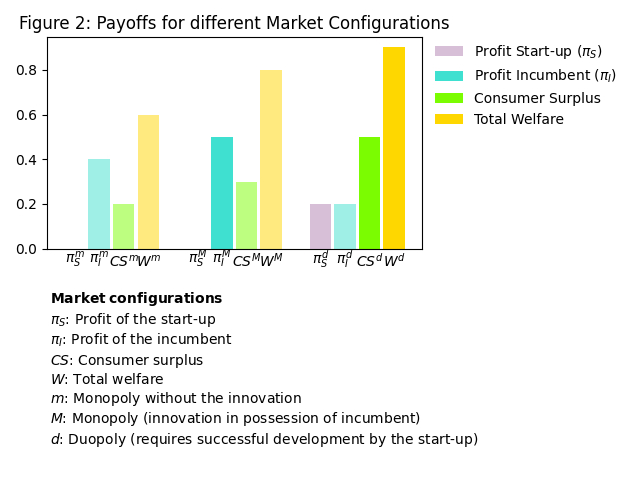

In [15]:
FMT20.Payoffs(FMT20.OptimalMergerPolicy()).plot(
    title="Figure 2: Payoffs for different Market Configurations"
);

<br>
<div style="text-align: justify">
The game is solved through backward induction, meaning that firstly, the decisions of the competition authority concerning the different bidding types are derived and secondly, the incumbent can anticipate the potential approvals or blockings of the different takeover bids. Thus, the incumbent adjusts its bidding decision accordingly and chooses the most profitable option available. E.g., under a strict policy with $p (\pi^M_I-\pi^m_I) < K $ and $F(\bar{A}) < \Phi'(\cdot) $ the incumbent would like to make a pooling bid, but it anticipates such a takeover to be blocked by the competition authority and therefore it is discouraged from a bid altogether. The following propositions define the outcomes for the four merger policies.
</div>

**PROPOSITION 1** in Fumagalli et al. (2020). Under a strict merger policy, the competition authority does not tolerate any early takeover, which results in a killer acquisition. Additionally, every late takeover is prohibited by the competition authority:

- If $p (\pi^M_I-\pi^m_I) < K $, no takeover takes place, because a pooling bid is blocked by the competition authority and a separating bid is not profitable for the incumbent.
- If $p (\pi^M_I-\pi^m_I) \ge K $
  - And $F(\bar{A}) \in [\Gamma(\cdot), max\{\Gamma(\cdot), \Phi(\cdot) \}) $, the incumbent makes an early pooling bid, since the probability, that the start-up is financially constrained, is small enough. This offer is accepted by any start-up and the competition authority approves the takeover, because it expects the incumbent to develop the product.
  - Otherwise, the incumbent makes an early separating offer. Even though a pooling bid is more profitable than a separating bid if $F(\bar{A}) < \Phi(\cdot) $, but an early pooling bid would be blocked if $F(\bar{A}) <\Gamma(\cdot) $. Therefore, an early separating bid remains the most profitable option. As long as the start-up is credit rationed, it accepts the offer, and the competition authority approves the offer.

Whenever a late takeover is possible, the prospect of an acquisition lowers the burden for the start-up to obtain enough financial assets on the capital markets compared to situations without late takeovers. However, the incumbent can suppress competition through a late takeover as well.

**PROPOSITION 2** in Fumagalli et al. (2020). Under a laissez-faire policy that authorizes any early or late takeover:

- If $p (\pi^M_I-\pi^m_I) < K $
  - And $F(\bar{A}^T) \ge \Phi^T(\cdot) $, no early takeover takes place, because a bid is not profitable for the incumbent. An unconstrained start-up is acquired through a late pooling bid if the investment is successful.
  - And $F(\bar{A}^T) < \Phi^T(\cdot) $, the incumbent makes an early pooling bid, since the probability is small enough, that the start-up is financially constrained. This offer is accepted by any start-up. The incumbent shelves the project afterwards.
- If $p (\pi^M_I-\pi^m_I) \ge K $, the incumbent makes an early separating bid. A credit-constrained start-up accepts the offer. The incumbent invests after a successful takeover. An unconstrained start-up rejects the offer but is acquired through a late pooling bid if the investment is successful.

<div style="text-align: justify">
Additionally, to the laissez-faire policy, an intermediate policy tolerating late takeovers is introduced in Fumagalli et al. (2020), but in contrast to the laissez-faire policy this policy is stricter with early takeovers. This intermediate policy is only feasible if the harm to total welfare due to the loss of market monopolization is lower than the harm done to total welfare by the combination of an early pooling bid and subsequent shelving of the product.
</div>

**PROPOSITION 3** in Fumagalli et al. (2020). Under an intermediate merger policy which authorizes any late takeover and prohibits early takeovers that involve a pooling bid and the subsequent suppression of the project:
- If $p (\pi^M_I-\pi^m_I) < K $, no early takeover occurs, because a pooling bid is blocked by the competition authority and a separating bid is not profitable for the incumbent. An unconstrained start-up will be acquired through a late pooling bid if the investment by the start-up is successful.
- $p (\pi^M_I-\pi^m_I) \ge K $, the incumbent makes an early separating bid. A credit-constrained start-up accepts the offer. The incumbent invests after a successful takeover. An unconstrained start-up rejects the offer but will be acquired through a late pooling bid if the investment by the start-up is successful.

<div style="text-align: justify">
Another intermediate policy is more lenient than a strict policy. Thus, it allows every early takeover but prohibits all late takeovers.
</div>

**LEMMA A-1** in Fumagalli et al. (2020). Under a policy that authorizes any early takeover and blocks any late takeover:
- If $p (\pi^M_I-\pi^m_I) < K $
  - And $F(\bar{A}) \ge \Phi'(\cdot) $, no takeover takes place, because a takeover is not profitable for the incumbent.
  - And $F(\bar{A}) < \Phi'(\cdot) $, the incumbent makes an early pooling offer, since the probability is small enough, that the start-up is financially constrained. Any start-up accepts the offer, and the competition authority authorizes the takeover. The incumbent shelves the innovation afterwards.
- If $p (\pi^M_I-\pi^m_I) \ge K $
  - And $F(\bar{A}) \ge \Phi(\cdot) $, the incumbent makes an early separating bid, because the probability is high, that the start-up is financially constrained. A credit-constrained start-up accepts the offer. The competition authority approves the takeover. Afterwards, the incumbent attempts the development of the innovation.
  - And $F(\bar{A}) < \Phi(\cdot) $, the incumbent makes an early pooling bid because the probability is low, that the start-up is financially constrained. Any start-up accepts the offer and the competition authority approves the takeover. Afterwards, the incumbent attempts the development of the innovation.

<div style="text-align: justify">
In the next part, the preceding propositions are compared with visualizations and additional explanations. The following four visualizations are covering the following situations: (1) the innovation as well as an early pooling bid is not profitable for the incumbent, (2) the innovation is not profitable for the incumbent, but an early pooling bid is, (3) the innovation is profitable for the incumbent, but an early pooling bid is not profitable and (4) the innovation and an early pooling bid are profitable for the incumbent. Note, that an early pooling bid is the most profitable option for the incumbent if (1a) the innovation is not profitable for the incumbent and (1b) $F(\bar{A}) < \Phi'(\cdot)$ or $F(\bar{A}^T) < \Phi^T(\cdot)$ for late takeovers or if (2a) the innovation is profitable for the incumbent and (2b) $F(\bar{A}) < \Phi(\cdot)$. An early pooling bid is never the best option for the incumbent, if the innovation is profitable for the incumbent and late takeovers are approved.
</div>
<br>
<div style="text-align: justify">
At first, let us have a look at the standard figure (e.g., figure 3) for the analysis: on the y-axis, the available merger policies are listed, meanwhile on the x-axis is the valid range of start-up assets, respectively their cumulative distribution function value, as the exact value is not known by anyone else than the start-up and the investors on the capital markets. The minimum respectively the maximum values on the x-axis are the cumulative distribution values of zero and the development costs since the start-up must obtain financial assets to cover the development costs. The legend on the right-hand side describes the outcome implied by the color-coded bars. Additionally, the legend outlines the model characteristics in form of the values of the essential thresholds for the assets of the start-up and the optimal merger policy.
<div>
<br>

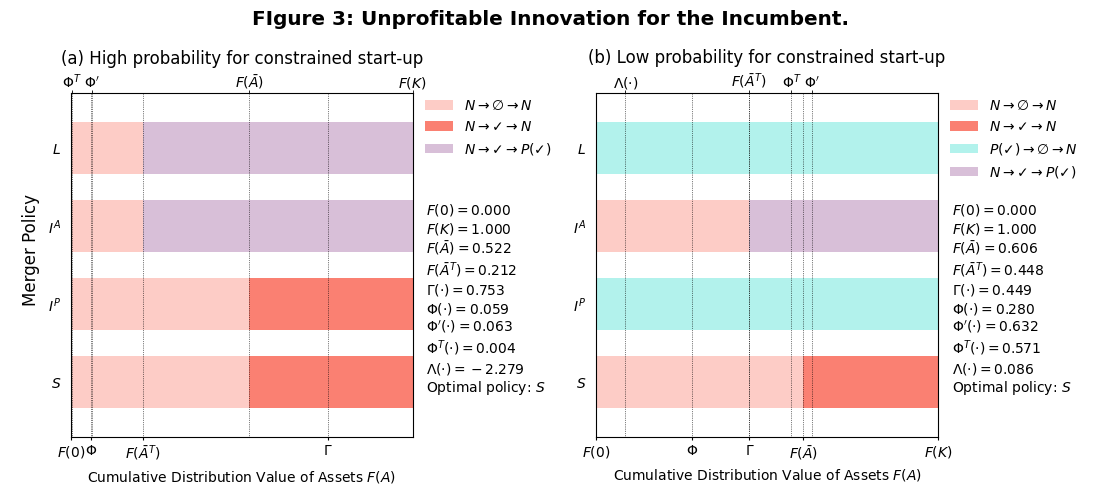

In [16]:
configure_two_axes(
    main="FIgure 3: Unprofitable Innovation for the Incumbent.",
    sub1="(a) High probability for constrained start-up",
    sub2="(b) Low probability for constrained start-up",
    c1=11,
    c2=12,
);

<br>
<div style="text-align: justify">
Now let us turn to the analysis of the model outcomes if the innovation is not profitable for the incumbent. Under a strict merger policy, the competition authority does not authorize early takeovers following a pooling bid, since a high takeover price indicates the foreclosure of competition. Furthermore, a separating bid is not profitable for the incumbent, because it cannot expect a positive additional profit from the acquired product in this scenario and the start-up firm is no competitional threat since it only accepts a separating bid if it does not own enough financial assets for the development of the product. Therefore, no takeovers occur under a strict merger policy if the product is not profitable for the incumbent and the product development is only attempted if the start-up is not credit rationed. Meanwhile under an intermediate merger policy, which is more lenient with early takeovers, a takeover following a pooling bid is not blocked, since the competition authority tolerates more harm to total welfare. Therefore, the incumbent has the opportunity to forgo competition with a killer acquisition. This opportunity will be seized, if a pooling bid is profitable (see figure 3a vs. figure 3b). Whenever a late takeover is allowed, the incumbent does not have to make an offer at an early stage (conditional on the incumbent’s payoffs) but can wait and see for the outcome of the development by the start-up and if the development is successful, the incumbent can make a late pooling bid and thus gain control of the start-up and thereby suppress competition. But if an early pooling bid is profitable compared to the situation without a bid, the incumbent prefers a killer acquisition opposed to a late takeover, however such attempt will only be approved by the competition authority under a laissez-faire regime, which allows every takeover attempt.
</div>
<br>
<div style="text-align: justify">
If the innovative product is profitable for the incumbent, the incumbent is interested in buying a constrained start-up to develop the product and not just in killing a potential competitor (figure 4a and figure 4b). Through a separating bid the incumbent is capable to acquire a credit constrained start-up and is able to take control over its product for a low price. The competition authority approves such an offer, because without the acquisition, it would expect the start-up to shelve the development due to financial constraints. Under a strict policy exists a scope for the probability of a constrained start-up, where the competition authority authorizes an early pooling bid in order to ensure the development of the innovation and the incumbent finds it profitable to make an early pooling bid. This scope is limited since the competition authority tries to avoid a takeover it the start-up would be able to develop the innovation on its own. Outside of this scope the incumbent makes a separating offer trying to acquire the start-up for its innovation. If a late takeover is not possible and the competition authority sets an intermediate policy, a trade-off arises for the incumbent between takeover price and control over the product. Therefore, if the probability for a credit-rationed start-up is high, the incumbent makes a separating bid and otherwise a pooling bid. In contrast to the strict policy, the competition authority approves every early takeover attempt without considering the choice of the incumbent. Whenever a late takeover is possible, the incumbent can at first offer a low price for the start-up and in a later stage if the development was successful, it offers a higher price in form of a late pooling bid. In the end the incumbent is always in possession of the innovative product if (1) its development was successful and (2) the competition authority approves late takeovers. In general, the innovation is never shelved by either the start-up or the incumbent if the innovation is profitable for the incumbent since a constrained start-up is always acquired through an early bid and the incumbent never shelves the development after a takeover.
</div>
<br>

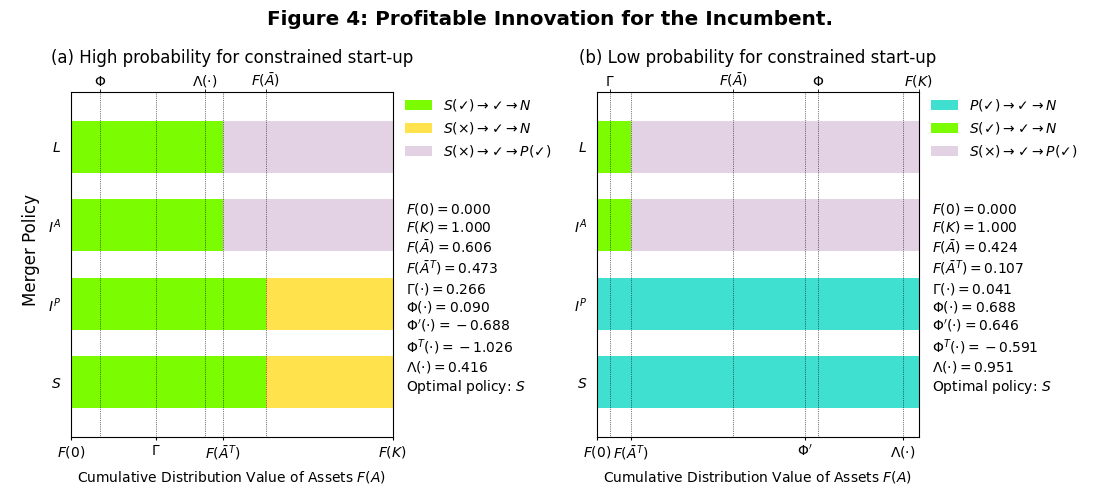

In [17]:
configure_two_axes(
    main="Figure 4: Profitable Innovation for the Incumbent.",
    sub1="(a) High probability for constrained start-up",
    sub2="(b) Low probability for constrained start-up",
    c1=13,
    c2=14,
);

<br>
<div style="text-align: justify">
From the perspective of the competition authority, the most intriguing question is, which merger policy is optimal. As seen in section 6 of Fumagalli et al. (2020), in general, a strict merger policy dominates the other policies, because under this policy the competition authority can avoid the suppression of competition through killer acquisitions and late takeovers as well as inefficiencies caused by financial constraints, since early takeovers through separating offers are always authorized (implying, that the innovation could not be developed without the takeover). Furthermore, an intermediate strategy, which does not approve late takeovers, but is more lenient with early takeovers, is never optimal, because the additionally approved takeovers weakly harm total welfare compared to a strict policy and therefore this policy is dominated by the strict policy. An intermediate policy, which is stricter with early takeovers than a laissez-faire policy but allows every late takeover as well as a laissez-faire policy may be optimal (figure 5a and figure 5b).
</div>
<br>

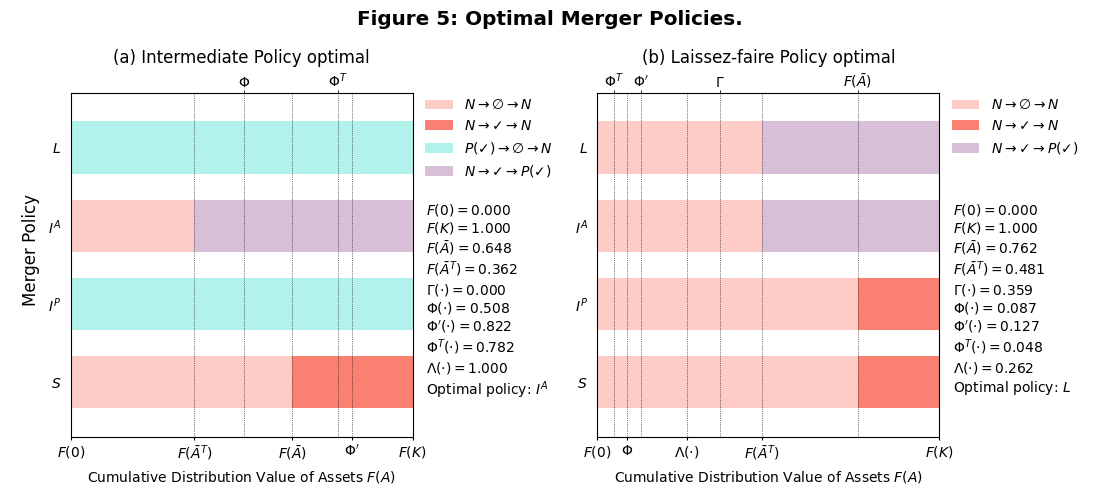

In [18]:
configure_two_axes(
    main="Figure 5: Optimal Merger Policies.",
    sub1="(a) Intermediate Policy optimal",
    sub2="(b) Laissez-faire Policy optimal",
    c1=15,
    c2=16,
);

<br>
<div style="text-align: justify">
For a policy, which approves late takeovers, to be optimal, the incumbent must be expected to shelve, and the relaxation of the financial constraints, through the prospect of a late takeover, must outweigh the benefits of additional competition, which arises in a duopoly under a strict policy (condition i and ii in table 7). The intermediate policy can only be optimal, if it is feasible (condition iii in table 7). If the intermediate policy is not feasible, a laissez-faire strategy is optimal if additionally, to the before mentioned conditions i and ii in table 7, the financial imperfections are severe, a trade-off between relaxation of the financial constraints and the benefits of more competition with the strict policy arises (condition iv in table 7).
</div>

*Table 7: Optimal Merger Policies*

| Policy | Conditions                                                                                          |
|:-------|:----------------------------------------------------------------------------------------------------|
| $I^A$  | (i) Incumbent is expected to shelve                                                                 |
|        | (ii) Relaxation of financial constraints dominates competitive effect                               |
|        | (iii) Approved early takeovers followed by shelving not optimal, i.e. $F(\bar{A}^T)<\Lambda(\cdot)$ |
| $L$    | (i) Incumbent is expected to shelve                                                                 |
|        | (ii) Relaxation of financial constraints dominates competitive effect                               |
|        | (iii) Approved early takeovers followed by shelving optimal, i.e. $F(\bar{A}^T)\ge\Lambda^T(\cdot)$ |
| 	     | (iv) Financial imperfections are severe, i.e. $F(\bar{A}^T)\ge\Phi^T(\cdot)$                       |
| $S$    | Otherwise                                                                                           |


## Pro Competitive

<br>
<div style="text-align: justify">
In this extension, the assumption A4 in Fumagalli et al. (2020), that the innovation is always welfare efficient, is relaxed. The assumption is changed to the extent that the innovation is only beneficial if developed and marketed by the start-up. Meanwhile, in the possession of the incumbent the innovation is always welfare reducing, this implies a positive effect of the innovation on the competition. Therefore, changing the reaction of the competition authority. Meanwhile the payoffs do not change for the incumbent. In this model the innovation cannot be profitable for the incumbent as given by other assumptions. The outcomes of the game just change for an intermediate policy, which is stricter with early takeovers than a laissez-faire policy for the case if a pooling bid is profitable. In this case, the competition authority prefers the shelving of the development by the incumbent compared to the possession of the developed product by the incumbent due to the changed assumption A4. Thus, a pooling bid resulting in a killer acquisition is not blocked by the competition authority, in contrast to the basic model (compare figure 3b and figure 6b).
</div>
<br>

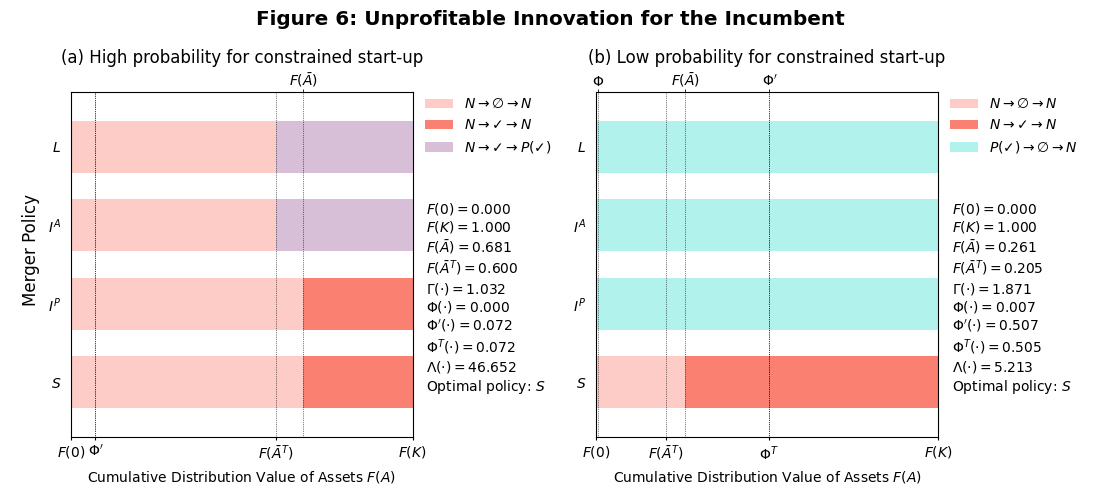

In [19]:
configure_two_axes(
    main="Figure 6: Unprofitable Innovation for the Incumbent",
    sub1="(a) High probability for constrained start-up",
    sub2="(b) Low probability for constrained start-up",
    c1=33,
    c2=32,
);

<br>
<div style="text-align: justify">
Since the innovation is only welfare beneficial in the hand of the start-up, the optimal merger policy is always a strict one. With a strict merger policy, the competition authority blocks every takeover attempt and eventually paves the way for the start-up to attempt the development and later challenge the incumbent. Even if the start-up is financially constrained, the competition authority favors the failure of the innovation over a takeover due to the adjusted assumption about the welfare efficiency.
</div>

## Waste of Resources

<br>
<div style="text-align: justify">
In this second extension of Fumagalli et al. (2020), the assumption, that the innovation is not always welfare efficient, is even further expanded, so that every development either by the incumbent or the start-up is a waste of resources, meaning that total welfare is always lower with the innovation than without. As well as in the model before, the innovation is never profitable for the incumbent. The outcome for the strict merger policy changes compared to the model in the previous section, which is now more lenient towards early takeovers since the competition authority expects the incumbent to shelve the product after a takeover. Therefore, if the incumbent makes a pooling bid, implying a high probability, that the start-up is not constrained, the competition authority prefers a killer acquisition to the development by the start-up, because the development is not efficient considering total welfare (figure 7).
</div>
<br>

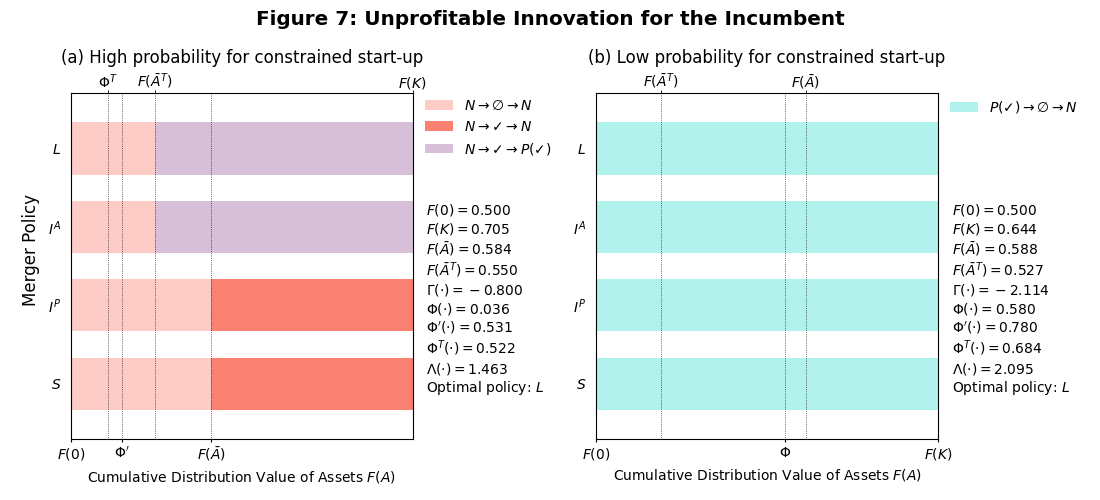

In [20]:
configure_two_axes(
    main="Figure 7: Unprofitable Innovation for the Incumbent",
    sub1="(a) High probability for constrained start-up",
    sub2="(b) Low probability for constrained start-up",
    c1=41,
    c2=43,
);

<br>
<div style="text-align: justify">
Since the development of the innovation is never optimal neither by the incumbent nor by the start-up, the merger policy, which avoids the most development attempts is optimal. In the calculation of the optimal strategy it is assumed, that the competition authority prefers more lenient policies. Since a strict policy and its more lenient intermediate policy as well as a laissez-faire policy and its stricter intermediate policy are not different, an intermediate policy, which does not tolerate late takeovers and a laissez-faire policy are compared. Therefore, with some exceptions the laissez-faire policy is optimal. Especially, if the start-up could obtain the necessary assets for the product development, but no killer acquisition is to take place with late takeovers (i.e., $F(\bar{A}) < \Phi'(\cdot)$ and $F(\bar{A}^T) \ge \Phi^T(\cdot) $). In this situation the intermediate policy is optimal, because the incumbent is forced to acquire the start-up through an early takeover in order to avoid future competition (figure 8).
</div>
<br>

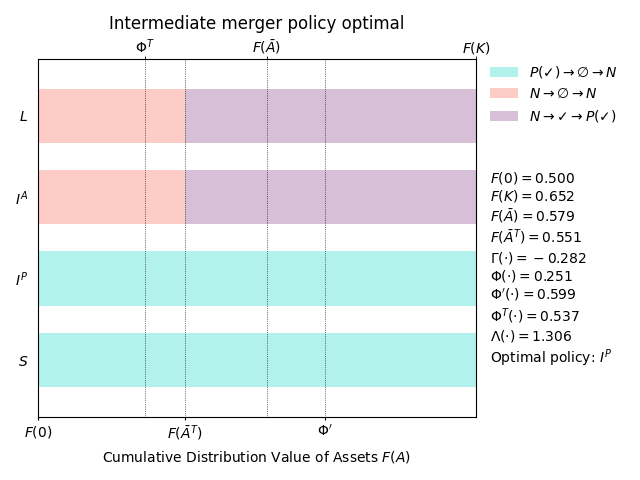

In [21]:
FMT20.MergerPoliciesAssetRange(get_model_by_id(42)).plot(
    **get_plot_kwargs("Intermediate merger policy optimal")
);

<br>

## Perfect Information

<br>
<div style="text-align: justify">
Meanwhile in the base model only the start-up and the investors from the capital markets know the exact amount of assets. In contrast, the incumbent as well as the competition authority receive the exact information about the start-up’s assets in this model.[3] Therefore, these parties can make detailed decision about the takeover respectively their blocking. E.g., the incumbent knows exactly, whether the start-up is financially constrained and can therefore adjust its bidding decision depending on the assets of the start-up. If the innovation is not profitable for the incumbent, under a strict policy the competition authority blocks any takeover through a pooling bid attempt since the incumbent is expected to shelve and the start-up obtains enough assets for the development on the capital markets, otherwise the incumbent would not offer a high takeover price. A separating bid never occurs, since this offer would only be accepted by a constrained start-up, but the incumbent is just interested in shutting down a potential competitor. If late takeovers are approved by the competition authority, the incumbent only acquires an unconstrained entrant through a pooling bid before the development stage. Otherwise, the incumbent awaits the outcome of the development and gains possession of the innovation through a late pooling bid after a successful development by the start-up.
</div>

[3] Fumagalli et al. (2020) does not provide the equilibrium of the game for an intermediate policy, which prohibits every late takeover.
<br>

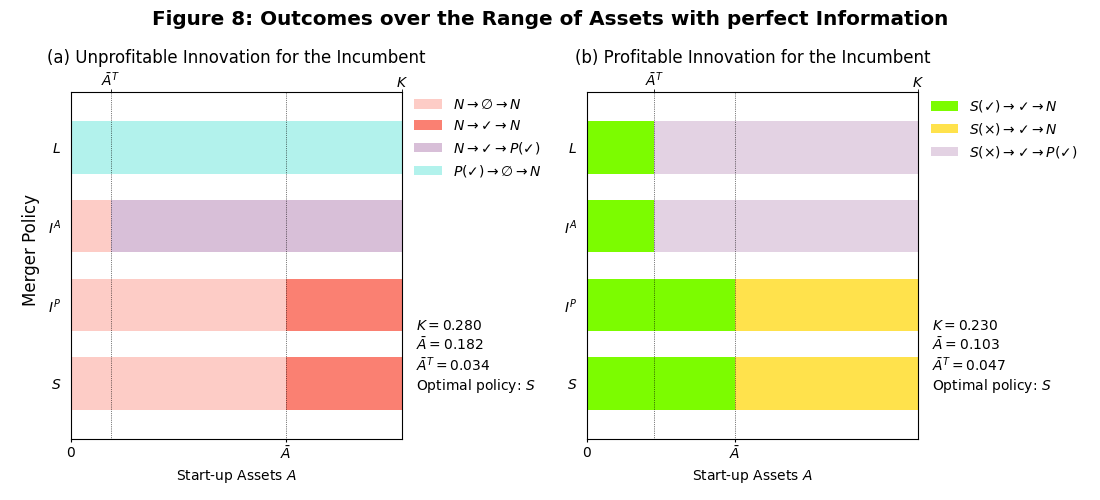

In [22]:
configure_two_axes(
    main="Figure 8: Outcomes over the Range of Assets with perfect Information",
    sub1="(a) Unprofitable Innovation for the Incumbent",
    sub2="(b) Profitable Innovation for the Incumbent",
    c1=50,
    c2=51,
    v1=FMT20.MergerPoliciesAssetRangePerfectInformation,
    v2=FMT20.MergerPoliciesAssetRangePerfectInformation,
    prefered_type=FMT20.PerfectInformation,
);

<br>
<div style="text-align: justify">
A strict merger policy is the best solution in most cases, but an intermediate policy, which is stricter with early takeovers than a laissez-faire policy can be optimal under certain circumstances (table 8). E.g., the opportunity of a late takeover can relax the financial constraints for the start-up and therefore increase the range of assets, where the innovation is introduced (but the start-up is then acquired by the incumbent via a late takeover).
</div>

*Table 8: Optimal Merger Policies with perfect Information*

| Policy | Conditions                                                                 |
|:-------|:---------------------------------------------------------------------------|
| $I^A$  | (i) Incumbent is expected to shelve                                        |
|        | (ii) Relaxation of financial constraints dominates competitive effect      |
|        | (iii) The intermediate policy is feasible, i.e. $p(W^M-W^m)-K \ge W^d-W^M$ |
| $S$    | Otherwise                                                                  |

<br>
<div style="text-align: justify">
The preceding reasoning is illustrated in figure 9}. In contrast to the model without perfect information, a laissez-faire policy is weakly dominated by a strict policy since it avoids killer acquisitions or the reduction of competition
in case of a development by the incumbent..
</div>
<br>

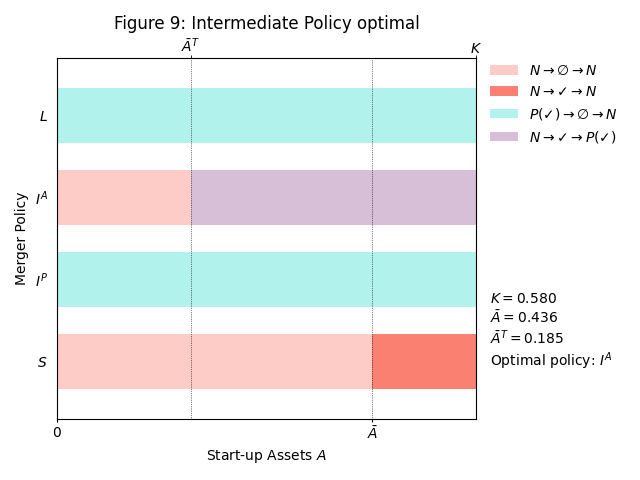

In [23]:
FMT20.MergerPoliciesAssetRangePerfectInformation(
    get_model_by_id(52, prefered_type=FMT20.PerfectInformation)
).plot(
    **get_plot_kwargs(
        title="Figure 9: Intermediate Policy optimal", y_label="Merger Policy"
    )
);

<br>

## Cournot Competition
<br>
<div style="text-align: justify">
This model introduces a new parameter $\gamma$, which describes the substitutability of the start-up’s product with the incumbent’s product. The higher $\gamma$ is, the more similar are the products. The payoffs are determined according to a Cournot competition[4]], but their ranking stays as assumed in the base model.[5] Additionally, the assumptions are expressed in terms of $\gamma$ to show the feasible values of this parameter, but they are not qualitatively different to the basic model. The outcomes do not change qualitatively either, since the payoffs satisfy the exact same assumptions as in the basic model. Just the threshold $\bar{A}^T$ is affected from a change, because its value is always smaller than zero, which implies $F(\bar{A}^T) =0$ under a uniform distribution of the start-up’s assets. Therefore, the start-up is never credit rationed if late takeovers are allowed. In sum, just the possible cases are reduced, but the outcomes of the remaining cases are not changed.
</div>
<br>
<div style="text-align: justify">
[4] A Cournot competition exists if two firms (establishing an oligopoly) compete by setting their respective outputs without cooperation. The prices are then determined by the market according to the quantities set by both parties beforehand (Norman and Chisholm, 2014,
pp. 83).
<br>
[5] Fumagalli et al. (2020) base their calculations of the payoffs with the newly introduced parameter $\gamma$ on the article of Singh and Vives (1984).
</div>
<br>

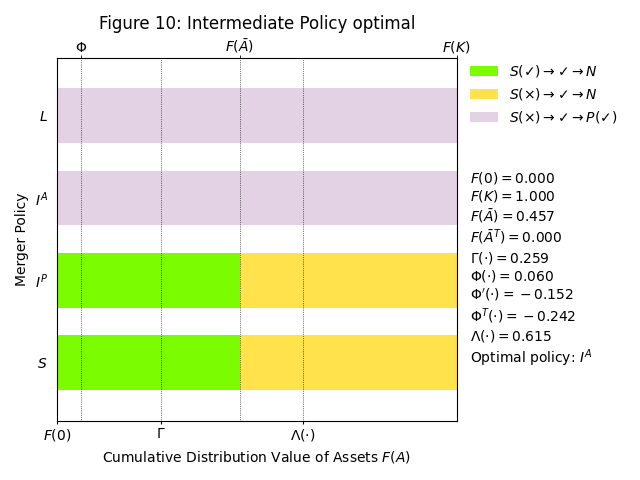

In [24]:
micro_foundation_int_opt = FMT20.CournotCompetition(
    development_costs=0.15,
    startup_assets=0.08,
    success_probability=0.91,
    private_benefit=0.11,
    gamma=0.18,
    asset_distribution=FMT20.Distributions.UniformDistribution,
)
FMT20.MergerPoliciesAssetRange(micro_foundation_int_opt).plot(
    **get_plot_kwargs(
        title="Figure 10: Intermediate Policy optimal", y_label="Merger Policy"
    )
);

<br>
<div style="text-align: justify">
A strict merger policy is often optimal, since if the incumbent is expected to develop the competition authority allows a takeover based on its beneficial effects and additionally prevents killer acquisitions. Under the following three conditions an intermediate policy, which is stricter with early takeover than a laissez-faire policy is optimal: firstly, the development costs are sufficiently high, meaning that the incumbent shelves for a greater scope. Secondly, the products are not perfect copies of each other ($\gamma$ near to 1) nor independent ($\gamma$ near to 0) but have an intermediate relation in terms of substitutability. Thirdly, the relaxations of the financial constraints through the prospect of a late takeover are high enough compared to the competitive effect of the innovation.
</div>

## References

**Fumagalli, Chiara, Massimo Motta, and Emanuele Tarantino**, “Shelving or developing: The Aquisition of potential competitors under financial constraints,” *CEPR Discussion Paper No. DP15113*, 2020.

**Furman, Jason, D. Coyle, A. Fletcher, D. McAuley, and P. Marsden**, “Unlocking digital competition: Report of the Digital Competition Expert Panel,” *UK Government Publication*, HM Treasury, 2019.

**Norman, George and Darlene C. Chisholm**, *Dictionary of Industrial Organization*, Edward Elgar Publishing, 2014.

**Singh, Nirvikar and Xavier Vives**, “Price and Quantity Competition in a Differentiated Duopoly,” *The RAND Journal of Economics*, 1984, 15 (4), 546–554.